In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix # Import Scores
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV # RandomSearchCV
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [2]:
# load dataset
df=pd.read_csv("DATA_Customer-Churn.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [4]:
def fill_null (df):
    mean_TotalCharges = round(df["TotalCharges"].mean())
    df["TotalCharges"] =  df["TotalCharges"].fillna(value=mean_TotalCharges)
    return df

In [5]:
df = fill_null(df)

In [6]:
churnData = df

In [7]:
# change categorical values in churn to numerical ones: No = 0 and Yes = 1
churnData.Churn = [i.replace("No", "0") for i in churnData.Churn]
churnData.Churn = [i.replace("Yes", "1") for i in churnData.Churn]

In [8]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1


## Feature Selection
### Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
X=churnData.drop(['gender', "Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup",
                  "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "Churn"], axis=1)
y=churnData.Churn

In [ ]:
# turning target value in actual numbers
y= y.apply(lambda x: 1 if x=="1" else 0)

## Splitting Data
- To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Building Decision Tree Model

In [ ]:
# in this case we calibrate model in such that there is max. 3 layers
model = DecisionTreeRegressor(criterion="friedman_mse", max_depth=3)

# AS THIS is a decision tree MODEL, we DONT need to SCALE the DATA
#trans = PowerTransform(), StandardScaler()
#trans.fit(X_train)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

In [ ]:
# Building up the performance Metrics


def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'PRedicted_value': y_pred_test})

    return performance, df_train, df_test

In [ ]:
# Visualize Model Performance
performance, _ ,_ = performance_model(y_train, y_test, y_pred_train, y_pred_test)
performance

In [ ]:
# Some test data
print(y_train.max())
print(y_train.min())
print(y_test.max())
print(y_test.min())
print(X_test.shape)
print(X_train.shape)

## Visualizing the decission tree

In [ ]:
print(churnData.columns)

In [ ]:
# Target variable is Churn, whereas 0 is stay and 1 is churn
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(model,filled = True, rounded=True)
plt.show()

## Compare with the classification route

In [ ]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dt.fit(X_train, y_train)

#Predict the response for test-train dataset
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

#prob_pred_test_dt = model.predict_proba(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

In [ ]:
# see what are the column names
for col in X_train.columns:
    print(col)

In [ ]:
churnData["SeniorCitizen"]

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(dt,filled = True, rounded=True)
plt.show()

## Scaling the Data (NO NEED to run as we are working with Decision Tree)

In [ ]:
# Scaling the data with standard scaler
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

## Training and Cross Validation (is a model validation method) with Random Forest

In [ ]:
# first step in the training and cross validation phase is to import the algorithm class with 300 iterations (-> Random Forest)
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [ ]:
# implement cross validation via setting up the scoring with folding = 5 times
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [ ]:
# implement cross validation via setting up the scoring with folding = 5 times
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)print(all_accuracies)

In [ ]:
print(all_accuracies.mean())

In [ ]:
print(all_accuracies.std())

- This is extremely low, which means that our model has a very low variance, which is actually very good since that means that the prediction that we obtained on one test set is not by chance. Rather, the model will perform more or less similar on all test sets.

In [ ]:
# the GRID Search estimators is initalized (checking which amount of iterations is more efficient?)
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# here you create the model
grid_class = GridSearchCV(estimator=classif# first step in the training and cross validation phase is to import the algorithm class with 300 iterations (-> Random Forest)
classifier = RandomForestClassifier(n_estimators=300, random_state=0)ier,
                     param_grid=grid_param,
                     cv=5,
                     n_jobs=-1) # use -1 (i.e. the end in Pandas) for max computing power

In [ ]:
# here you fit/run the model
grid_class.fit(X_train, y_train)

In [ ]:
# these are the parameters that GRID search model slected to work with
best_parameters = grid_class.best_params_
print(best_parameters)

In [ ]:
# highest accuracy score GRID search model was optimizing for
best_result = grid_class.best_score_
print(best_result)

In [ ]:
# uses the best model that was found in your grid search and applies it to your test data
y_predict = grid_class.predict(X_test)
y_predict

In [ ]:
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test,y_predict),
                                        precision_score(y_test, y_predict),
                                        recall_score(y_test, y_predict)]})
# these are the parameters that GRID search model slected to work with
best_parameters = grid_class.best_params_
print(best_parameters)
display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_predict).T)
plot_confusion_matrix(grid_class, X_test, y_test, values_format = 'd')
plt.show()

In [ ]:
# data is quite imbalanced, maybe that is the reason for the suboptimal results above
y_test.value_counts()

## Upsampling using SMOTE

In [9]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,1


In [10]:
# getting only target column, whereas 0 is No and 1 is Yes concerning the Churn
target = churnData.Churn
target

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: object

In [11]:
# getting only numerical columns
numerical = churnData._get_numeric_data()
numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [12]:
# getting only categorical columns
categorical = churnData.select_dtypes(object)
categorical

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,0
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,0
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,1
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,0
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,0
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,0
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month,0
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,1


In [13]:
# turn the categorical columns into dummy variables so SMOTE can "read" it
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categorical)
encoded_categorical = encoder.transform(categorical).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)

In [14]:
encoded_categorical

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7039,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7040,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7041,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
# putting the 3 sub-tables together
data = pd.concat([numerical, encoded_categorical,target], axis = 1)
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,Churn
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
7039,0,72,103.20,7362.90,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
7040,0,11,29.60,346.45,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7041,1,4,74.40,306.60,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [16]:
# Upsampling via SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()

y = data['Churn']
X = data.drop(['Churn'], axis = 1)

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [17]:
X_sm.shape

(10348, 23)

In [18]:
# we have to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)

In [19]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [20]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
8969,0,1,45.179594,45.179594,0.0,0.0,0.000000,1.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.0
7136,0,48,52.813592,2542.131634,1.0,1.0,1.000000,0.038249,0.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.961751,0.961751,0.0,1.0
3668,0,22,59.750000,1374.350000,1.0,1.0,0.000000,1.000000,0.0,1.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.0,0.0
1701,0,66,102.450000,6615.150000,0.0,1.0,1.000000,1.000000,0.0,0.0,...,1.000000,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000,0.0,1.0
3143,0,13,72.800000,930.050000,1.0,1.0,1.000000,1.000000,0.0,0.0,...,1.000000,0.0,1.0,0.0,1.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,72,89.400000,6376.550000,1.0,1.0,1.000000,1.000000,0.0,1.0,...,1.000000,0.0,1.0,0.0,1.0,0.0,1.000000,0.000000,1.0,0.0
5191,0,23,91.100000,2198.300000,0.0,1.0,1.000000,1.000000,0.0,1.0,...,1.000000,0.0,1.0,0.0,1.0,0.0,1.000000,0.000000,1.0,0.0
5390,1,12,99.450000,1200.150000,1.0,0.0,0.000000,1.000000,0.0,0.0,...,1.000000,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.0,1.0
860,0,26,19.800000,457.300000,1.0,0.0,0.000000,1.000000,1.0,0.0,...,0.000000,1.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.0,0.0


## Applying K-Fold Cross Validation with Random Forest on balanced Data Set

In [23]:
# first step in the training and cross validation phase is to import the algorithm class with 300 iterations (-> Random Forest)
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [24]:
# implement cross validation via setting up the scoring with folding = 5 times
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [25]:
print(all_accuracies)

[1. 1. 1. 1. 1.]


In [26]:
print(all_accuracies.mean())

1.0


In [27]:
print(all_accuracies.std())

0.0


In [29]:
# the GRID Search estimators is initalized (checking which amount of iterations is more efficient?)
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# here you create the model
grid_class = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     cv=5,
                     n_jobs=-1) # use -1 (i.e. the end in Pandas) for max computing power

In [30]:
# here you fit/run the model
grid_class.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=300, random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 300, 500, 800, 1000]})

In [31]:
# these are the parameters that GRID search model slected to work with
best_parameters = grid_class.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 100}


In [32]:
# highest accuracy score GRID search model was optimizing for
best_result = grid_class.best_score_
print(best_result)

1.0


In [33]:
# uses the best model that was found in your grid search and applies it to your test data
y_predict = grid_class.predict(X_test)
y_predict

array(['1', '0', '0', ..., '1', '1', '0'], dtype=object)

In [34]:
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test,y_predict),
                                        precision_score(y_test, y_predict),
                                        recall_score(y_test, y_predict)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_predict).T)
plot_confusion_matrix(grid_class, X_test, y_test, values_format = 'd')
plt.show()

NameError: name 'y_pred_train_dt' is not defined

In [21]:
# apply the random forest model on the Upsampled Model
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9996779388083736


In [22]:
y_pred=clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9996779388083736


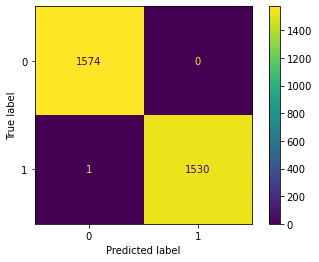

In [28]:
from sklearn.metrics import plot_confusion_matrix
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

## Applying K-Fold Cross Validation with Random Forest on balanced Data Set

In [ ]:
# first step in the training and cross validation phase is to import the algorithm class with 300 iterations (-> Random Forest)
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [ ]:
# implement cross validation via setting up the scoring with folding = 5 times
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)

In [ ]:
print(all_accuracies)

In [ ]:
print(all_accuracies.mean())

In [ ]:
print(all_accuracies.std())

- AGAIN it is extremely low, which means that our model has a very low variance, which is actually very good since that means that the prediction that we obtained on one test set is not by chance. Rather, the model will perform more or less similar on all test sets.

In [ ]:
# the GRID Search estimators is initalized (checking which amount of iterations is more efficient?)
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# here you create the model
grid_class = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     cv=5,
                     n_jobs=-1) # use -1 (i.e. the end in Pandas) for max computing power

In [ ]:
# here you fit/run the model
grid_class.fit(X_train, y_train)

In [ ]:
# these are the parameters that GRID search model slected to work with
best_parameters = grid_class.best_params_
print(best_parameters)

In [ ]:
# highest accuracy score GRID search model was optimizing for
best_result = grid_class.best_score_
print(best_result)

In [ ]:
# uses the best model that was found in your grid search and applies it to your test data
y_predict = grid_class.predict(X_test)
y_predict

In [ ]:
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test,y_predict),
                                        precision_score(y_test, y_predict),
                                        recall_score(y_test, y_predict)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_predict).T)
plot_confusion_matrix(grid_class, X_test, y_test, values_format = 'd')
plt.show()

## K-Fold Cross Validation with the StraitfiedKfold estimator

In [ ]:
# Lets split the data into 5 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
# Note that: 
# cross_val_score() parameter 'cv' will by default use StratifiedKFold spliting startergy if we just specify value of number of folds. 
# So you can bypass above step and just specify cv= 5 in cross_val_score() function

In [ ]:
# Using Random Forest Classifier
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

In [ ]:
# Random Forest Classifier Tuning.
# Here we are going to do tuning based on 'n_estimators'. We will try with estimators
# starting from 50 to 350 and depending on the final 'rmse' score, choose the value of estimator.

n_estimators = [50, 100, 150, 200, 250, 300, 350]

for val in n_estimators:
    score = cross_val_score(ensemble.RandomForestClassifier(n_estimators= val, random_state= 42), X, y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

## Conclusion
- As we can see the K-Fold Cross Validation approach provided for similar results as the Grid Search Validation approach above with minor improvements, indicating that the problem might as well be found on the available dataset.